## load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## load Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data exploration

In [3]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
d = train.isnull().sum()
d

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
d[d>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

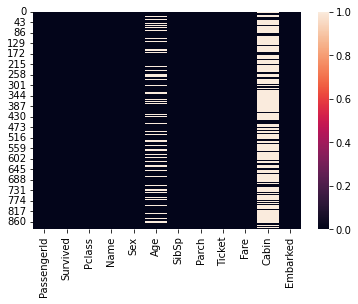

In [8]:
sns.heatmap(train.isnull())

## Data cleaning

In [9]:
def clean(d):
  d.drop(["Name","Cabin","Ticket","Embarked","Fare"],axis = 1 ,inplace = True)
  d.Age = train.Age.fillna(train.Age.mean())
  d.dropna()
clean(train)
clean(test)

<AxesSubplot:>

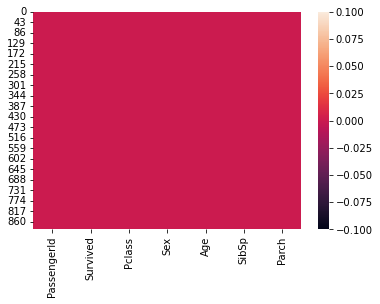

In [10]:
sns.heatmap(train.isnull())

<AxesSubplot:>

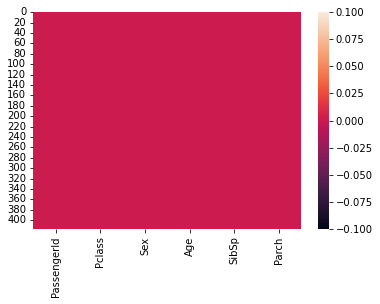

In [11]:
sns.heatmap(test.isnull())

## data analysis

In [12]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000


<AxesSubplot:>

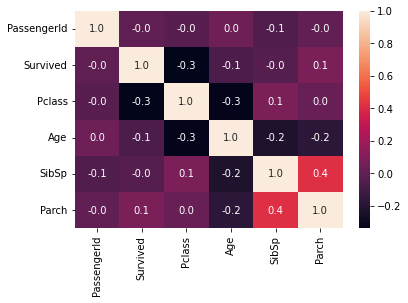

In [13]:
sns.heatmap(train.corr(),annot = True ,fmt =".1f")

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

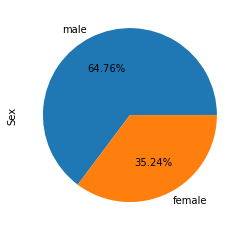

In [16]:
train.Sex.value_counts().plot.pie(autopct="%0.2f%%")

<AxesSubplot:xlabel='Sex', ylabel='count'>

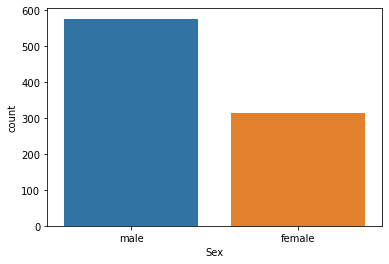

In [17]:
sns.countplot(x=train["Sex"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

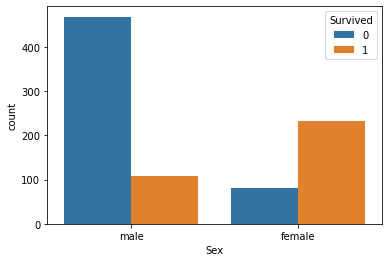

In [18]:
sns.countplot(x=train["Sex"],hue = train["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

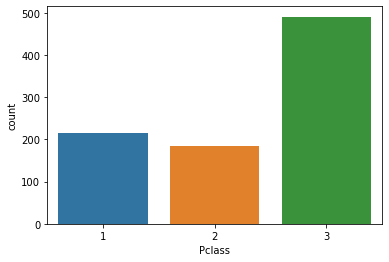

In [19]:
sns.countplot(x=train["Pclass"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

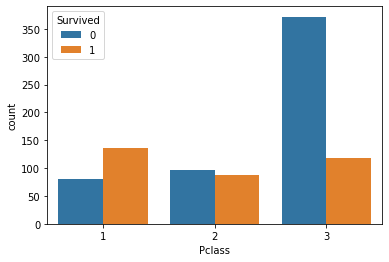

In [20]:
sns.countplot(x=train["Pclass"],hue = train["Survived"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

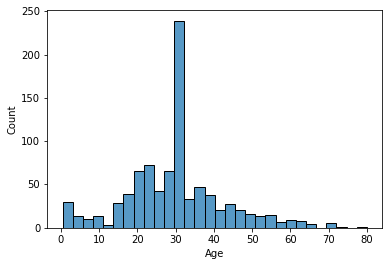

In [21]:
sns.histplot(train.Age)

## Data transformation

In [22]:
train['Sex'].replace({'female': 0, 'male': 1}, inplace=True)
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [24]:
test['Sex'].replace({'female': 0, 'male': 1}, inplace=True)
test


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,22.000000,0,0
1,893,3,0,38.000000,1,0
2,894,2,1,26.000000,0,0
3,895,3,1,35.000000,0,0
4,896,3,0,35.000000,1,1
...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0
414,1306,1,0,44.000000,0,0
415,1307,3,1,29.699118,0,0
416,1308,3,1,34.000000,0,0


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [26]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [27]:
x = train.drop("Survived",axis=1)
y = train.Survived

## Create model

In [41]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.20,shuffle=True,
                                                  random_state=10)

In [42]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()

In [43]:
accuracies = []

def all(model):
    model.fit(xtrain,ytrain)
    pre = model.predict(xtest)
    accuracy = accuracy_score(pre,ytest)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
 
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})

C:\Users\Priso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.8156424581005587
accuracy = 0.7821229050279329
accuracy = 0.6927374301675978
accuracy = 0.8435754189944135
accuracy = 0.7318435754189944
accuracy = 0.8547486033519553


In [44]:
new

,algorithms,accuracies
0,LogisticRegression,0.815642
1,GaussianNB,0.782123
2,MLPClassifier,0.692737
3,RandomForestClassifier,0.843575
4,DecisionTreeClassifier,0.731844
5,GradientBoostingClassifier,0.854749


In [45]:
modelx = RandomForestClassifier(max_depth= 7, max_features= "auto", n_estimators=50)
modelx.fit(xtrain,ytrain)
prex = modelx.predict(xtest)
accuracy_score(prex,ytest)

0.8603351955307262

In [46]:
acc = accuracy_score(ytest, prex)
print(f'Accuracy: {acc}')

cm = confusion_matrix(ytest, prex)
print(f'Confusion Matrix: \n{cm}')

cr = classification_report(ytest, prex)
print(f'Classification Report: \n{cr}')


Accuracy: 0.8603351955307262
Confusion Matrix: 
[[106  11]
 [ 14  48]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       117
           1       0.81      0.77      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



In [47]:
prexx = modelx.predict(test)
prexx

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [48]:
final = test.PassengerId
new_data = pd.DataFrame({"PassengerId":final,"Survived":prexx})
new_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
new_data.to_csv("predict for Titanic.csv",index = False)

In [51]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(modelx, f)
